In [4]:
#We want to see Mean/standard deviation + similarity measure over time on the same graph. + maybe do them in timed average to get rid of the fluctuations.
# I personnally, also want to confirm that the probabilities w, impact the shape of the distirbution ho I see it in the gifs. the schmidt with the bigger prob is the largest. 

import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from Schmidt_solve import plot_schmidt_value_time
from Interference import interference_plot

In [24]:


def strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,EI,w,env, plot = True):
    mean1_list=[]
    mean2_list=[]
    st1_tst1_list=[]
    st1_tst2_list=[]
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        
        mean1 = np.sum(np.array(energy_coeff) * np.array(eigenenergies_total))
        mean2 = np.sum(np.array(energy_coeff2) * np.array(eigenenergies_total))
        st1_tst1 = np.mean((np.array(energy_coeff) * np.array(eigenenergies_total)-mean1)**2)
        st1_tst2 = np.mean((np.array(energy_coeff2) * np.array(eigenenergies_total)-mean2)**2)
        mean1_list.append(mean1)
        mean2_list.append(mean2)
        st1_tst1_list.append(st1_tst1)
        st1_tst2_list.append(st1_tst2)
    
    if plot:
        plt.plot(tlist[1:len(tlist)], mean1_list)
        plt.plot(tlist[1:len(tlist)], mean2_list)
        plt.plot(tlist[1:len(tlist)], st1_tst1_list)
        plt.plot(tlist[1:len(tlist)], st1_tst2_list)

        plt.title(f"Plot of the means and standard dev of the distributions of Schmidt 1 and 2 EI={EI} and w={w} and env={env}")
        plt.xlabel("Time")
        plt.ylabel("Units of energy")
        plt.legend(["mean s1", "mean s2", "strd dev s1", "strd dev s2"])
    else :
        return mean1_list, mean2_list, st1_tst1_list, st1_tst2_list

def strd_dev_mean_simi_plot_characterize(d1=10,d2=200,w=[0.1,0.2,0.3,0.4], E_spacing=1.0, EI=[0.03,0.05,0.07,0.09],tmax=10, ind_nb =100,env=[0]): 

    mean1_list_list=[]
    mean2_list_list=[]
    st1_tst1_list_list=[]
    st1_tst2_list_list=[]
    for wi in w:  
        for EIi in EI:
            print(f'wi_{wi}_EI_{EIi}')           
            result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,wi, E_spacing, EIi, tmax, ind_nb,1)
            eigenenergies_total, eigenstates_total = H_total.eigenstates()
            print("generated")
            mean1_list, mean2_list, st1_tst1_list, st1_tst2_list = strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,EI,w,env,False)

            mean1_list_list.append(mean1_list)
            mean2_list_list.append(mean2_list)
            st1_tst1_list_list.append(st1_tst1_list)
            st1_tst2_list_list.append(st1_tst2_list)

    fig, axs = plt.subplots(len(w), len(EI), figsize=(10, 2*len(w)), sharex=True, sharey=True)

    for i in range(len(w)):
        for j in range(len(EI)):
            axs[i, j].plot(tlist[0:len(tlist) - 1], mean1_list_list[i*len(EI) + j])
            axs[i, j].plot(tlist[0:len(tlist) - 1], mean2_list_list[i*len(EI) + j])
            axs[i, j].plot(tlist[0:len(tlist) - 1], st1_tst1_list_list[i*len(EI) + j])
            axs[i, j].plot(tlist[0:len(tlist) - 1], st1_tst2_list_list[i*len(EI) + j])
            #axs[i, j].set_title(f"Plot of the means and standard dev of the distributions of Schmidt 1 and 2 w={w[i]}, EI={EI[j]}, env={env}", fontsize=5)
            axs[i, j].set_xlabel("Time", fontsize=6)
            axs[i, j].set_ylabel("Unit of energy", fontsize=8)
    plt.title(f"Plot of the means and standard dev of the distributions of Schmidt 1 and 2 w={w[i]}, EI={EI[j]}, env={env}", fontsize=5)
    plt.legend(["mean s1", "mean s2", "strd dev s1", "strd dev s2"])
    plt.tight_layout()
    plt.savefig(f'Graphs/mean_sdrt_characterization_EI_{EI},w_{w},env_{env}.png')
    plt.show()

wi_0.1_EI_0.03
generated
wi_0.1_EI_0.05
generated
wi_0.1_EI_0.07
generated
wi_0.1_EI_0.09
generated
wi_0.2_EI_0.03
generated
wi_0.2_EI_0.05
generated
wi_0.2_EI_0.07
generated
wi_0.2_EI_0.09
generated
wi_0.3_EI_0.03
generated
wi_0.3_EI_0.05
generated
wi_0.3_EI_0.07
generated
wi_0.3_EI_0.09
generated
wi_0.4_EI_0.03
generated
wi_0.4_EI_0.05
generated
wi_0.4_EI_0.07
generated
wi_0.4_EI_0.09
generated


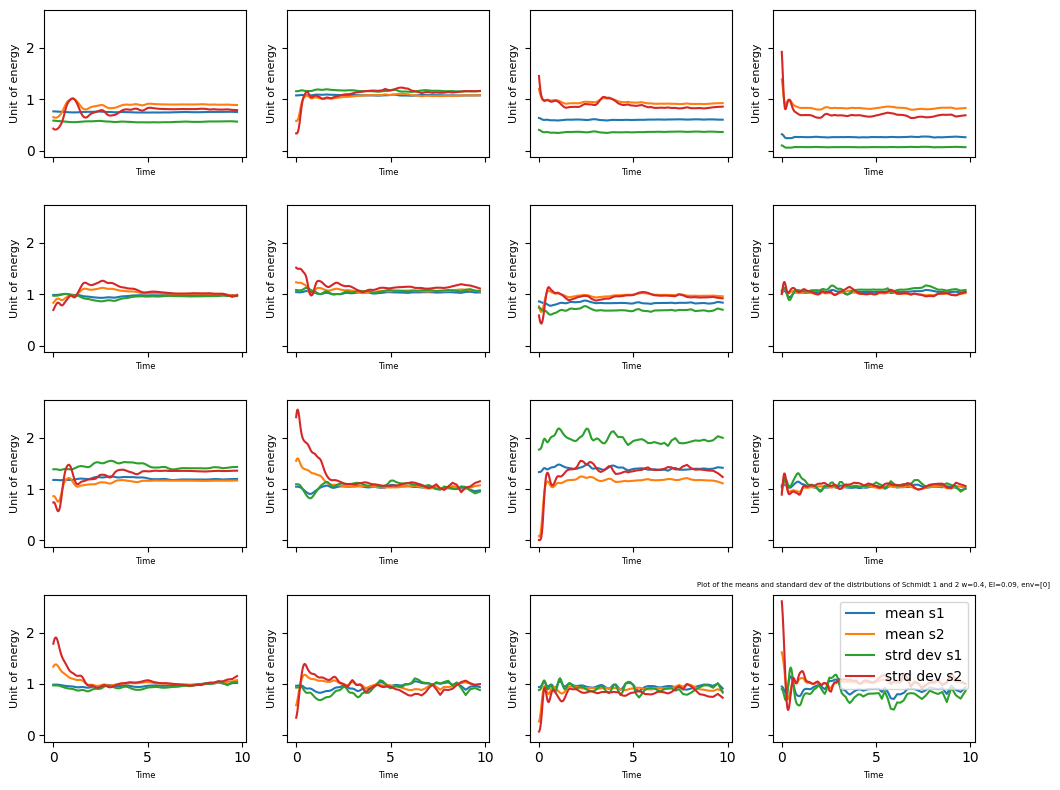

In [25]:
strd_dev_mean_simi_plot_characterize()

wi_0.1_EI_0.03
generated
wi_0.1_EI_0.05
generated
wi_0.2_EI_0.03
generated
wi_0.2_EI_0.05
generated


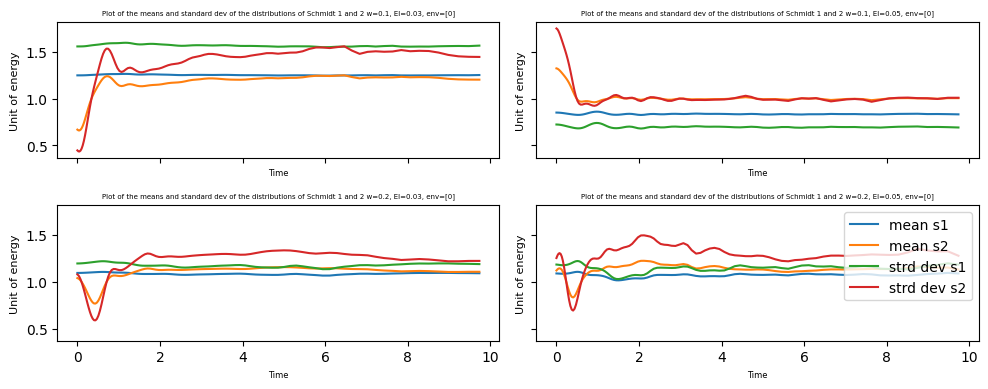

In [23]:
strd_dev_mean_simi_plot_characterize(10,200,[0.1,0.2],1.0,[0.03,0.05],10,100,[0])

In [18]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.0321
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 


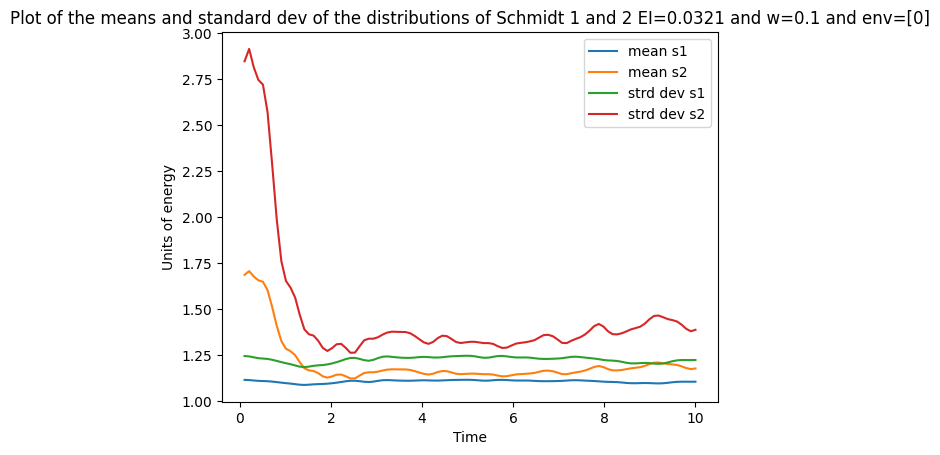

In [19]:
strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,Int_strength,w,[0])